In [1]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
iris = load_iris()

In [2]:
X=iris.data[:,:2]  #first two columns

In [3]:
sse=[] #sum of sqred error or Inertia for each K
sihouette=[] #avg sil score for each K

In [4]:
#variable K takes : 2 to 10
for K in range(2,11):
  kmeans=KMeans(n_clusters=K,random_state=42,n_init='auto')
  kmeans.fit(X)
  sse.append(kmeans.inertia_) #inertia contains the sse
  sihouette.append(silhouette_score(X,kmeans.labels_))


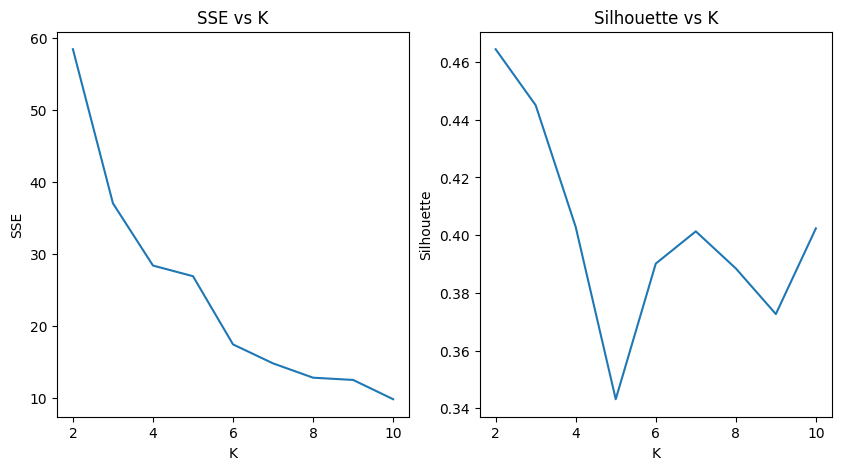

In [5]:
#subplot for K and sse , the K and silhouette
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(2,11),sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs K')

plt.subplot(1,2,2)
plt.plot(range(2,11),sihouette)
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.title('Silhouette vs K')

plt.show()

In [6]:
optimal_k=np.argmax(sihouette)+2
print("Optimal number for clusters:",optimal_k)

Optimal number for clusters: 2


In [7]:
#Do the same steps for Petals column
Y=iris.data[:,2:]


In [8]:
sse1=[] #sum of sqred error or Inertia for each K
sihouette1=[] #avg sil score for each K

In [9]:
#variable K takes : 2 to 10
sse1.clear()
sihouette1.clear()
for K in range(2,11):
  kmeans=KMeans(n_clusters=K,random_state=42,n_init='auto')
  kmeans.fit(Y)
  sse1.append(kmeans.inertia_) #inertia contains the sse
  sihouette1.append(silhouette_score(Y,kmeans.labels_))

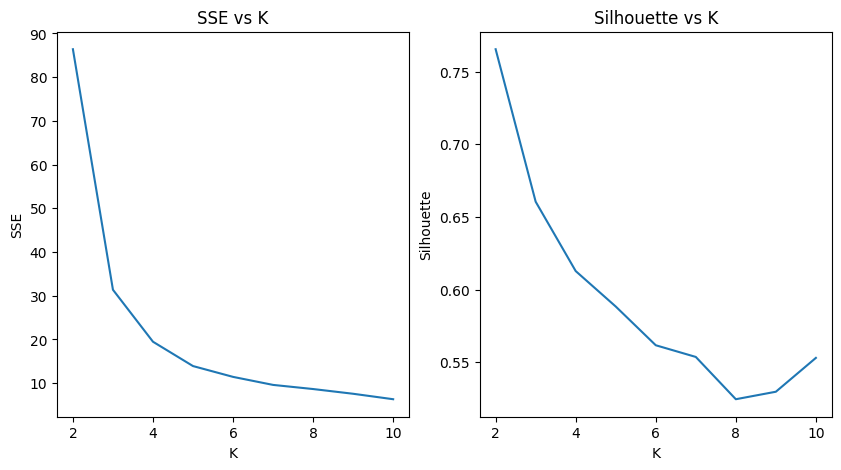

In [10]:
#Subplot for the above see1 and silhouette1
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(2,11),sse1)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs K')

plt.subplot(1,2,2)
plt.plot(range(2,11),sihouette1)
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.title('Silhouette vs K')

plt.show()

In [11]:
optimal_k=np.argmax(sihouette1)+2
print("Optimal number for clusters:",optimal_k)

Optimal number for clusters: 2


Using New Dataset: Credit Card

In [12]:
df=pd.read_csv("/content/CC GENERAL.csv")
print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [13]:
#check for null values
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [14]:
# Select features
features = ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']

In [15]:
# Drop missing values
df_selected = df[features].fillna(df[features].mean())

In [16]:
# Standardize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_selected)

In [17]:
pip install pyclustertend

In [18]:
#test for hopkins stats from package
from sklearn.neighbors import NearestNeighbors
from pyclustertend import hopkins

h_credit=hopkins(scaled_df,scaled_df.shape[0])  #use full dataset
print(f"Hopkins Statistic for  Dataset:{h_credit:.4f}")

round(h_credit,4)

Hopkins Statistic for  Dataset:0.0073


np.float64(0.0073)

In [19]:

# Determine optimal K
sse_df = []
silhouette_df = []


In [20]:
#variable K takes : 2 to 10
for K in range(2,11):
  kmeans=KMeans(n_clusters=K,random_state=42,n_init='auto')
  kmeans.fit(scaled_df)
  sse_df.append(kmeans.inertia_) #inertia contains the sse
  silhouette_df.append(silhouette_score(scaled_df,kmeans.labels_))

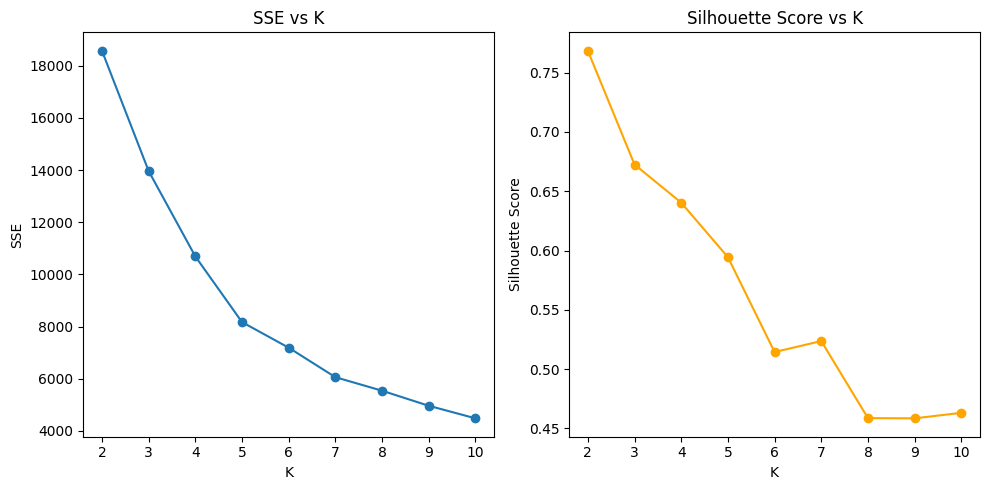

In [21]:
#create sublot for sse and silhouete against K#Subplot for the above see_df and silhouette_df for credit card dataset
# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse_df, marker='o')
plt.title('SSE vs K')
plt.xlabel('K')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_df, marker='o', color='orange')
plt.title('Silhouette Score vs K')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [22]:
optimal_k=np.argmax(silhouette_df)+2
print("Optimal number for clusters:",optimal_k)

Optimal number for clusters: 2


In [23]:
#apply kmeans with K=2
kmeans=KMeans(n_clusters=2)
kmeans.fit(scaled_df)
#add cluster labels to data frame
df['Features_clusters']=kmeans.labels_


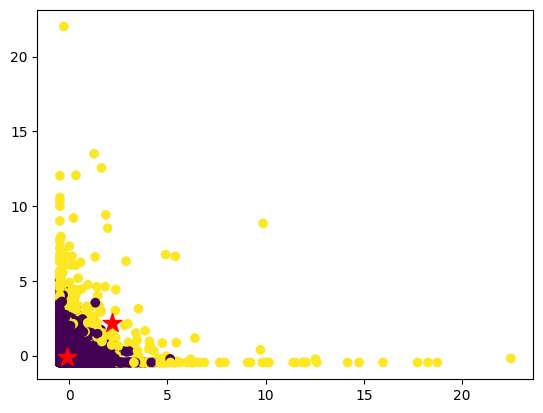

In [24]:
#visualise clusters
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=200)
plt.show()

In [25]:
#print final cluster
print("\nCredit Card Dataset with assigned clusters:\n")
print(df.to_string(index=False))


Streaming output truncated to the last 5000 lines.
 C14061     8.585976           0.545455     512.59            352.50                  160.09      0.000000             0.500000                    0.083333                          0.333333                0.000000                 0             10   2500.000000   908.190297         67.458687          0.250000      12                  0
 C14062    32.612016           0.454545     545.88            545.88                    0.00      0.000000             0.250000                    0.250000                          0.000000                0.000000                 0              4   2000.000000  1100.892272        150.867379          0.500000      12                  0
 C14063   174.214883           0.363636       0.00              0.00                    0.00    956.089092             0.000000                    0.000000                          0.000000                0.083333                 1              0   1200.000000   238.065240  

In [26]:
#save to excel
df.to_excel("Credit Card features clusters.xlsx",index=False)
print("\nDataset with clusters saved as 'Credit Card Features Clusters.xlsx'")


Dataset with clusters saved as 'Credit Card Features Clusters.xlsx'
